# Atividade SUMMIT - Avaliação Cross Validation

## Contexto
Na área biomédica, o desenvolvimento de modelos de aprendizado de máquina precisa ser acompanhado de avaliações rigorosas, pois erros podem comprometer interpretações clínicas.
A validação cruzada (Cross-Validation, CV) é uma técnica que divide os dados em partes (folds), permitindo testar o modelo em diferentes subconjuntos do dataset. Isso garante uma estimativa mais justa do desempenho do classificador.

No entanto, existem diversos tipos de validação cruzada (KFold, StratifiedKFold, ShuffleSplit, Leave-One-Out, etc.), cada um com características próprias. A escolha do tipo de validação pode influenciar os resultados obtidos, alterando tanto a acurácia média quanto a distribuição dos erros (falsos positivos e falsos negativos) na matriz de confusão.

## Objetivo
O objetivo desta atividade é comparar o desempenho do classificador SVM em dois esquemas de validação:


*   KFold-10
*   RepeatedKFold (10x3)  


Cada grupo deverá analisar se a escolha da estratégia de validação impacta ou não o desempenho do modelo.


## Metodologia obrigatória

### 1. Pré-processamento

  * Padronizar os atributos numéricos com StandardScaler (Pipeline).
  Tratar valores ausentes, se existirem.

### 2. Modelo

  * Classificador SVM (Support Vector Machine).

  * Ajuste de hiperparâmetros com GridSearchCV.

  * Parâmetros a serem testados:

    * C = [0.01, 0.1, 1, 10, 100]

    * kernel = [linear, não-lineares]

    * gamma = [scale, 0.01, 0.001] (apenas para RBF)

### 3. Validação

  * Aplicar KFold-10 (comum a todos).

  * Comparar com o tipo de CV designado ao grupo (RepeatedKFold).

### 4. Avaliação

  * Acurácia média (com desvio padrão).

  * Matriz de confusão representativa, destacando os erros de classificação (falsos positivos e falsos negativos).

## Produto final
Cada grupo deverá entregar um resumo científico (300–500 palavras) contendo:

Introdução – importância da validação cruzada em modelos biomédicos.

Objetivo – comparação entre KFold-10 e o RepeatedKFold.

Metodologia – descrição do dataset, pré-processamento, SVM, GridSearchCV e tipos de CV aplicados.

Resultados – valores médios de acurácia e matriz de confusão para cada CV.

Discussão/Conclusão – interpretação das diferenças (ou semelhanças) entre os dois métodos de validação.

# Dataset: Heart Disease

O conjunto de dados utilizado neste estudo foi obtido da base pública disponibilizada pelo UCI Machine Learning Repository e também disponível no Kaggle (link para o dataset
). Este dataset contém informações clínicas e demográficas de pacientes para auxiliar na predição da presença de doenças cardíacas.

Descrição geral:
O dataset é composto por amostras de pacientes com variáveis que abrangem dados pessoais, sintomas e resultados de exames médicos, permitindo a construção de modelos preditivos para diagnóstico cardíaco. A variável alvo é a presença ou ausência de doença cardíaca.

## Descrição das colunas:


- **id:** Identificador único de cada paciente  
- **age:** Idade do paciente (anos)  
- **origin:** Local de origem ou estudo  
- **sex:** Sexo do paciente (Masculino/Feminino)  
- **cp:** Tipo de dor no peito (angina típica, angina atípica, não anginosa, assintomática)  
- **trestbps:** Pressão arterial em repouso (mm Hg na admissão hospitalar)  
- **chol:** Colesterol sérico (mg/dl)  
- **fbs:** Açúcar no sangue em jejum (>120 mg/dl: verdadeiro/falso)  
- **restecg:** Resultados do eletrocardiograma em repouso (normal, anormalidade ST-T, hipertrofia do VE)  
- **thalach:** Frequência cardíaca máxima atingida  
- **exang:** Angina induzida por exercício (sim/não)  
- **oldpeak:** Depressão do segmento ST induzida por exercício em relação ao repouso  
- **slope:** Inclinação do segmento ST no pico do exercício  
- **ca:** Número de grandes vasos coronários (0-3) visíveis por fluoroscopia  
- **thal:** Estado do tálamo (normal, defeito fixo, defeito reversível)  
- **num:** Variável alvo — diagnóstico da doença cardíaca (presença ou ausência)  



## Referência para Citação

Os autores originais do dataset solicitam que publicações que utilizem esses dados incluam o nome do investigador principal responsável pela coleta dos dados em cada instituição:

Hungarian Institute of Cardiology, Budapeste: Andras Janosi, M.D.

University Hospital, Zurich, Suíça: William Steinbrunn, M.D.

University Hospital, Basel, Suíça: Matthias Pfisterer, M.D.

V.A. Medical Center, Long Beach e Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

# Modelagem Utilizada

- **Validação cruzada:**  
  Comparação entre KFold (10 folds) e RepeatedKFold (10 folds, 3 repetições).

- **Pré-processamento:**  
  Padronização dos atributos numéricos com `StandardScaler` via Pipeline.  
  Tratamento de valores ausentes, se houver, preenchendo com mediana após transformação das variáveis categóricas em dummies.

- **Classificador:**  
  Support Vector Machine (SVM), capaz de lidar com dados lineares e não lineares.

- **Otimização de hiperparâmetros:**  
  Busca em grade (`GridSearchCV`) para ajustar os parâmetros `C`, `kernel` e `gamma`, utilizando os métodos de validação cruzada para avaliação.


# Instalação do dataset Heart Disease

In [ ]:
import pandas as pd

# Download do arquivo via Google Drive do projeto
csv_url = 'https://drive.google.com/uc?id=1cqO_TXww8VW3AC1F1hqVUrm9k8_2StZ4'

df_heart = pd.read_csv(csv_url)

# Imports e baselines

In [ ]:
from sklearn.model_selection import RepeatedKFold, KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

RANDOM_STATE = 42

def plot_confusion_matrix(model, X_test, y_test, class_names, title):
    # Plota a matriz de confusão com matplotlib padrão
    disp = ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test, display_labels=class_names
    )
    plt.title(title)
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

## Modelagem de dados

In [ ]:
# 1. Apresentar os valores nulos iniciais
print("Valores nulos por coluna (antes do tratamento):")
print(df_heart.isnull().sum())

# 2. Separar features e target
X = df_heart.drop(columns=["num"])
y = df_heart["num"]

# 3. Transformar variáveis categóricas em dummies (mesmo com nulos)
X = pd.get_dummies(X, drop_first=True)

# 4. Tratar os valores nulos — preencher com a **mediana** das colunas (todas são numéricas agora)
X = X.fillna(X.median(numeric_only=True))

# 5. Verificar valores nulos após o tratamento
print("\nValores nulos por coluna (após tratamento):")
print(X.isnull().sum())

# 6. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE
)

# 7. Aplicando o StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFormato após scaling:", X_train_scaled.shape, X_test_scaled.shape)


Valores nulos por coluna (antes do tratamento):
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Valores nulos por coluna (após tratamento):
id                          0
age                         0
trestbps                    0
chol                        0
thalch                      0
oldpeak                     0
ca                          0
sex_Male                    0
dataset_Hungary             0
dataset_Switzerland         0
dataset_VA Long Beach       0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
fbs_True                    0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_rev

# Divisões de testes - GridSearch


=== Resultados com KFold ===
Melhores parâmetros: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Acurácia média (cross-val): 0.5962
Acurácia no teste: 0.6159


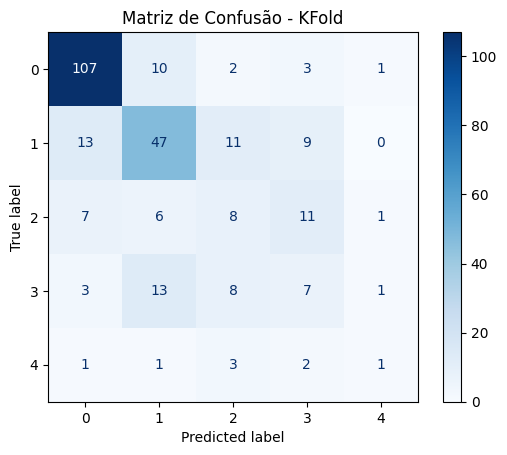


=== Resultados com RepeatedKFold ===
Melhores parâmetros: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Acurácia média (cross-val): 0.5981
Acurácia no teste: 0.6159


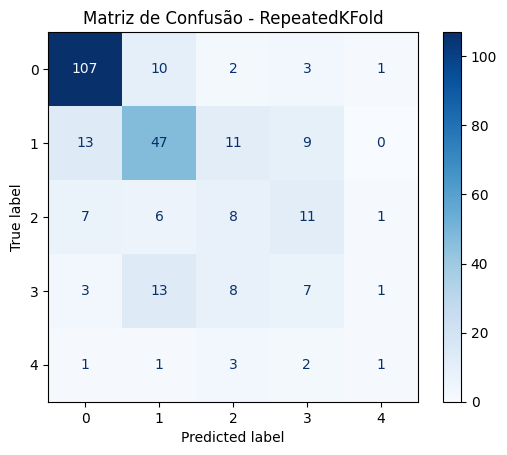

In [ ]:
# Definição dos hiperparâmetros
param_grid = {
    "svm__C": [0.01, 0.1, 1, 10, 100],
    "svm__kernel": ["linear", "rbf"],        # linear + não linear (RBF)
    "svm__gamma": ["scale", 0.01, 0.001]     # só será usado no RBF
}

pipe_kernel_i = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(random_state=RANDOM_STATE))
])

# Configurações dos validadores
cv_kfold = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
cv_repeated = RepeatedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)


# Função para rodar grid, avaliar e mostrar matriz de confusão
def avaliar_grid(pipeline, X_train, y_train, X_test, y_test, cv, nome_cv):
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    print(f"\n=== Resultados com {nome_cv} ===")
    print("Melhores parâmetros:", grid.best_params_)
    print("Acurácia média (cross-val):", round(grid.best_score_, 4))

    # Avaliação no conjunto de teste
    y_pred = grid.predict(X_test)
    acc_test = grid.score(X_test, y_test)
    print("Acurácia no teste:", round(acc_test, 4))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusão - {nome_cv}")
    plt.show()

    return grid

# Rodar com KFold
grid_kfold = avaliar_grid(pipe_kernel_i, X_train, y_train, X_test, y_test, cv_kfold, "KFold")

# Rodar com RepeatedKFold
grid_repeated = avaliar_grid(pipe_kernel_i, X_train, y_train, X_test, y_test, cv_repeated, "RepeatedKFold")